Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn .model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, balanced_accuracy_score,matthews_corrcoef

In [2]:
# Loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [3]:
# First 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Last 5 rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [7]:
# Distribution of legitimate transactions (non-fraudulent transactions = 0) and fraudulent transactions (fraudulent transactions = 1)
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


This Dataset is highly imbalanced

0 --> legitimate transactions (non-fraudulent transactions = 0)

1--> fraudulent transactions (fraudulent transactions = 1)


# Visualizations


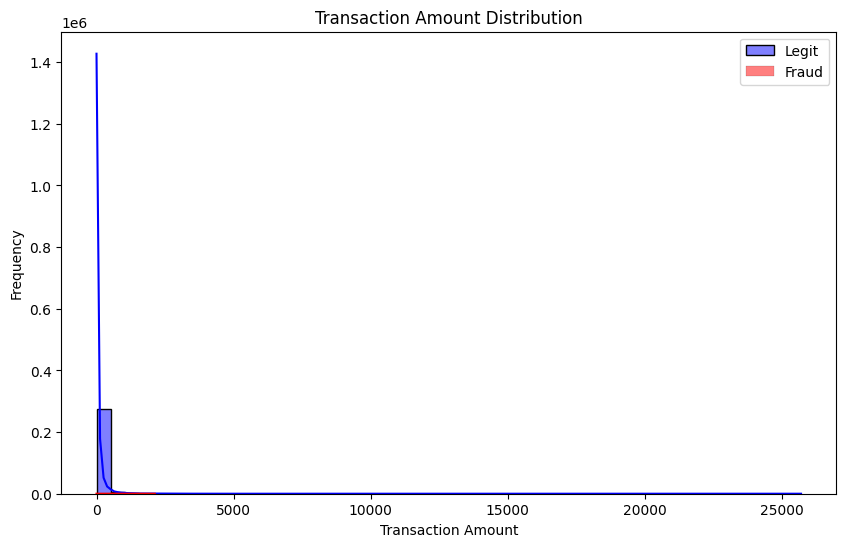

In [8]:
grouped_data = credit_card_data.groupby('Class')

# Legitimate transactions (Class = 0)
legit_amounts = grouped_data.get_group(0)['Amount']

# Fraudulent transactions (Class = 1)
fraud_amounts = grouped_data.get_group(1)['Amount']

# Plotting the histograms
plt.figure(figsize=(10, 6))
sns.histplot(legit_amounts, bins=50, kde=True, color='blue', label='Legit')
sns.histplot(fraud_amounts, bins=50, kde=True, color='red', label='Fraud')
plt.legend()
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


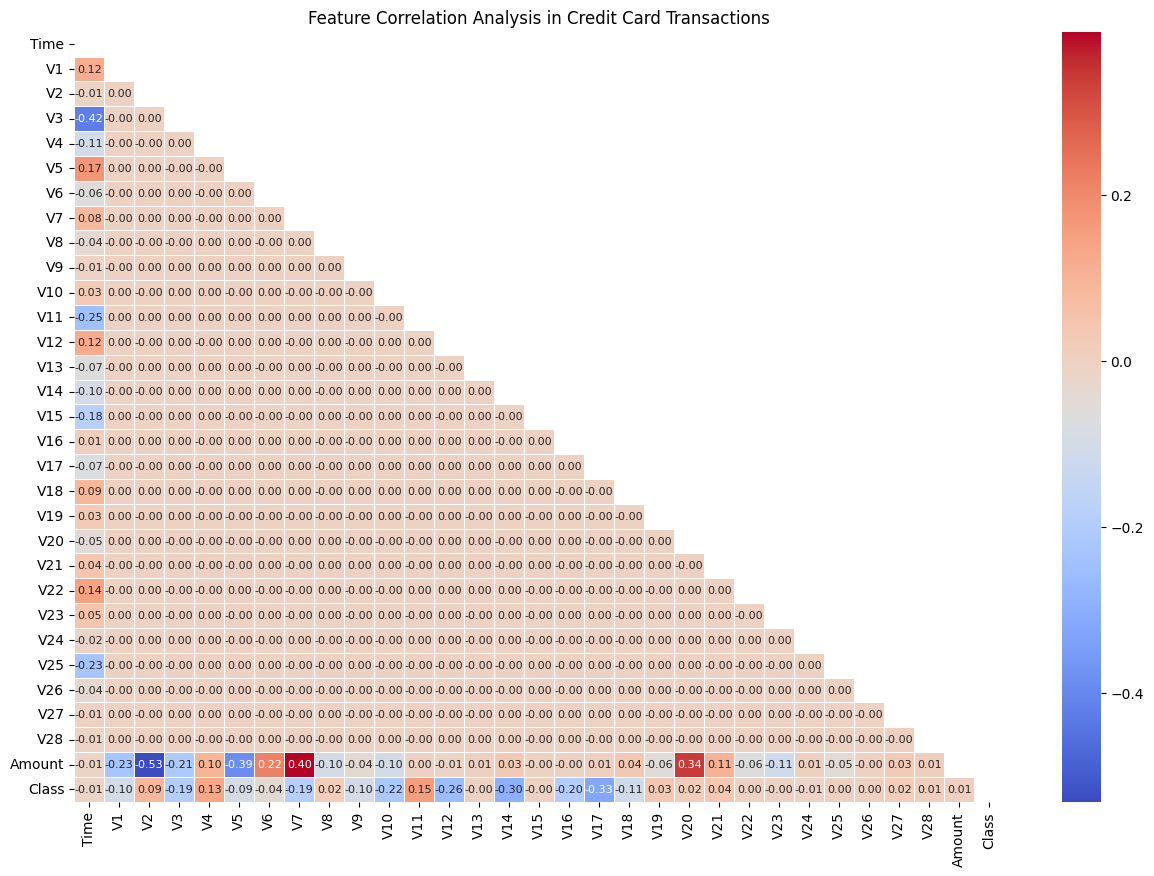

In [9]:
# Correlation matrix with mask to avoid redundancy
corr = credit_card_data.corr()

# Mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, mask=mask,cmap='coolwarm', linewidths=0.5, fmt='.2f', annot_kws={"size":8})
plt.title('Feature Correlation Analysis in Credit Card Transactions')
plt.show()

In [10]:
# Feature Engineering: Scaling Amount
scaler = StandardScaler()
credit_card_data['Amount_scaled'] = scaler.fit_transform(credit_card_data['Amount'].values.reshape(-1,1))

In [11]:
# Separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [12]:
print(legit.shape)
print(fraud.shape)

(284315, 32)
(492, 32)


In [13]:
# Statistical measures of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [14]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [15]:
# Compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Amount_scaled
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022,-0.000234
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,0.135382


Under-Sampling


Build a sample dataset containing similar distribution of normal transactions and Fradulent Transactions

Number of Fraudulent Transactions --> 492



In [16]:
# Sampling legitimate transactions to balance the dataset
legit_sample = credit_card_data[credit_card_data['Class'] == 0].sample(n=492)
fraud = credit_card_data[credit_card_data['Class'] == 1]


Concatenating two DataFrames

In [17]:
new_dataset = pd.concat([legit_sample, fraud], axis=0).sample(frac=1, random_state=42)

In [18]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_scaled
42756,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.00,1,-0.353229
189337,128354.0,0.282642,0.716126,-1.173629,-0.803969,1.656536,-0.092801,1.430995,-0.157416,-0.691164,...,0.480750,-0.321944,-0.242910,0.325975,0.468398,-0.080789,-0.041466,34.95,0,-0.213496
111690,72327.0,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,238.90,1,0.601913
241779,151182.0,1.450816,-2.137514,-1.305653,-0.995160,-0.252875,1.838137,-0.870020,0.502059,-0.054128,...,-0.454017,0.182475,-0.976158,-0.739676,-0.522690,-0.011364,-0.011221,317.77,0,0.917242
8591,11588.0,1.165413,-0.164534,0.659332,0.235405,-0.456427,0.080599,-0.454931,0.064128,1.786376,...,-0.037617,-0.037824,0.061181,0.318412,1.084688,-0.081518,-0.018757,12.80,0,-0.302054


In [19]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_scaled
163273,115809.0,1.889341,-2.128383,-0.960978,-1.664021,-1.319986,0.191100,-1.172316,-0.022091,-1.246442,...,-0.843250,0.129672,-1.145684,-0.558410,-0.460191,-0.003948,-0.018147,224.85,0,0.545740
178760,123770.0,0.314057,1.084261,0.676285,3.410841,0.482321,0.388616,0.388162,-0.843360,-1.218739,...,0.110221,-0.198793,-0.087099,0.750096,0.218385,0.189335,0.264971,28.83,0,-0.237965
189587,128471.0,0.909124,1.337658,-4.484728,3.245358,-0.417809,-0.762119,-2.506349,0.694164,-0.467556,...,0.594078,-0.252120,0.325439,0.562766,-0.256278,0.652674,0.319879,67.90,1,-0.081759
8271,11068.0,1.227444,0.009995,0.774133,0.122968,-0.528485,-0.298509,-0.482799,-0.087533,1.356495,...,0.197870,-0.079317,0.058681,0.252679,1.030413,-0.087563,-0.005552,15.95,0,-0.289460
275764,166712.0,-6.005595,3.182988,-1.899391,0.747845,-2.610737,-0.185044,-2.620364,1.834575,-0.125093,...,-2.181450,-0.158937,-0.159571,0.715634,-0.976133,-0.722846,-0.364143,14.90,0,-0.293658


In [20]:
new_dataset['Class'].value_counts()

,count
Class,
1,492
0,492


In [21]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Amount_scaled
Class,,,,,,,,,,,,,,,,,,,,,
0,93082.995935,0.011448,0.080304,0.036927,-0.079110,-0.028559,-0.062367,0.070797,0.034709,0.000859,...,0.023631,-0.043913,0.037110,-0.038692,0.044446,-0.032173,0.024844,-0.004567,81.683333,-0.026652
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321,0.135382


Splitting the data into Features & Targets

In [22]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [23]:
print(X)

            Time         V1        V2         V3        V4        V5  \
42756    41233.0 -10.645800  5.918307 -11.671043  8.807369 -7.975501   
189337  128354.0   0.282642  0.716126  -1.173629 -0.803969  1.656536   
111690   72327.0  -4.198735  0.194121  -3.917586  3.920748 -1.875486   
241779  151182.0   1.450816 -2.137514  -1.305653 -0.995160 -0.252875   
8591     11588.0   1.165413 -0.164534   0.659332  0.235405 -0.456427   
...          ...        ...       ...        ...       ...       ...   
163273  115809.0   1.889341 -2.128383  -0.960978 -1.664021 -1.319986   
178760  123770.0   0.314057  1.084261   0.676285  3.410841  0.482321   
189587  128471.0   0.909124  1.337658  -4.484728  3.245358 -0.417809   
8271     11068.0   1.227444  0.009995   0.774133  0.122968 -0.528485   
275764  166712.0  -6.005595  3.182988  -1.899391  0.747845 -2.610737   

              V6         V7        V8        V9  ...       V21       V22  \
42756  -3.586806 -13.616797  6.428169 -7.368451  ...  2.571

In [24]:
print(Y)

42756     1
189337    0
111690    1
241779    0
8591      0
         ..
163273    0
178760    0
189587    1
8271      0
275764    0
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing data

In [25]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [26]:
print(X.shape, X_train.shape, X_test.shape)

(984, 31) (787, 31) (197, 31)


Model Training

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy on Training Data: 0.9581
Accuracy on Test Data: 0.9645
Precision: 0.9789
Recall: 0.9490
F1 Score: 0.9637
ROC-AUC Score: 0.9873
MCC: 0.9294
Balanced Accuracy: 0.9644


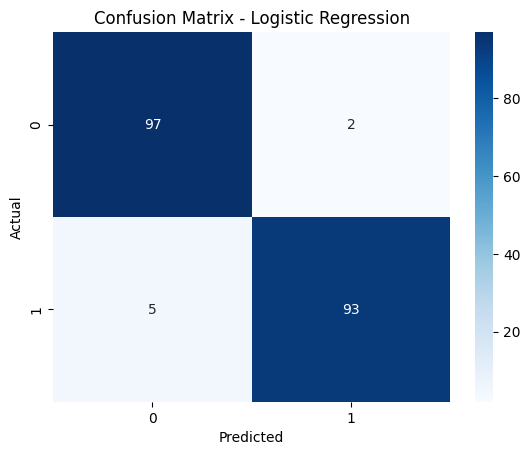

Model: RandomForestClassifier
Accuracy on Training Data: 0.9784
Accuracy on Test Data: 0.9492
Precision: 0.9681
Recall: 0.9286
F1 Score: 0.9479
ROC-AUC Score: 0.9919
MCC: 0.8992
Balanced Accuracy: 0.9491


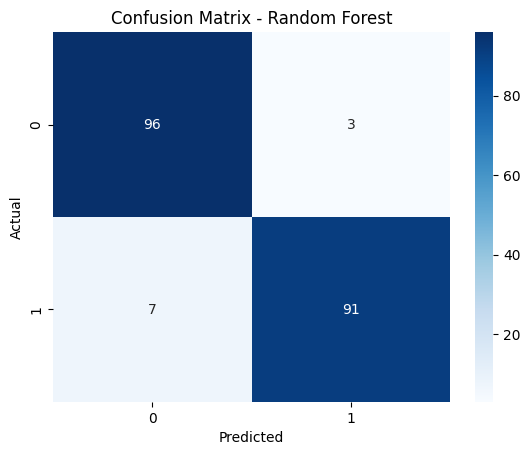

Model: GradientBoostingClassifier
Accuracy on Training Data: 1.0000
Accuracy on Test Data: 0.9594
Precision: 0.9688
Recall: 0.9490
F1 Score: 0.9588
ROC-AUC Score: 0.9908
MCC: 0.9190
Balanced Accuracy: 0.9593


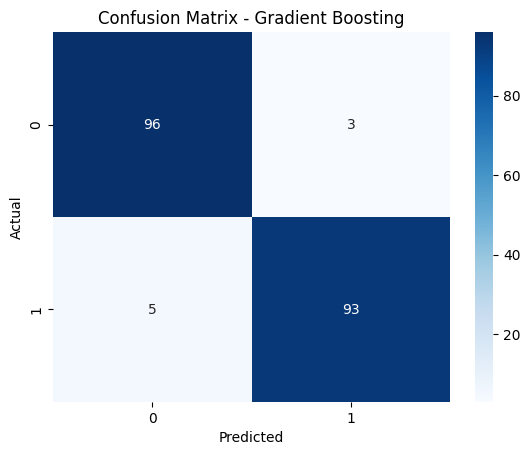

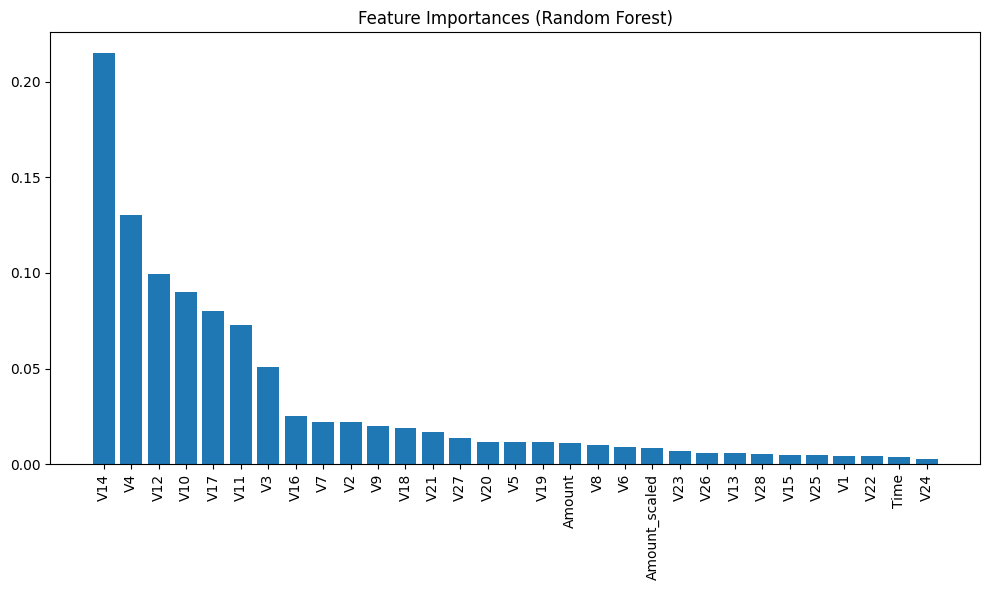

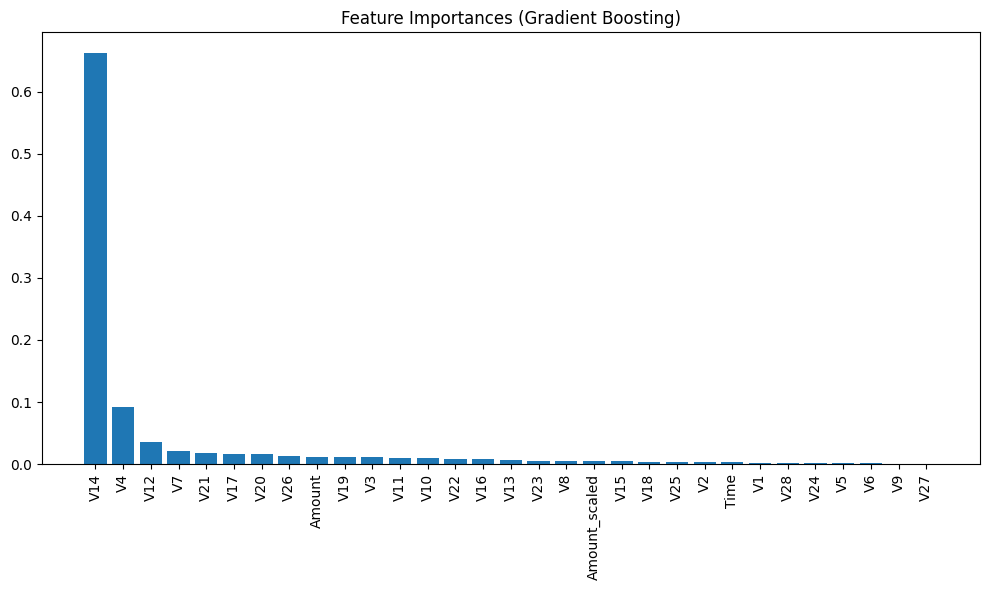

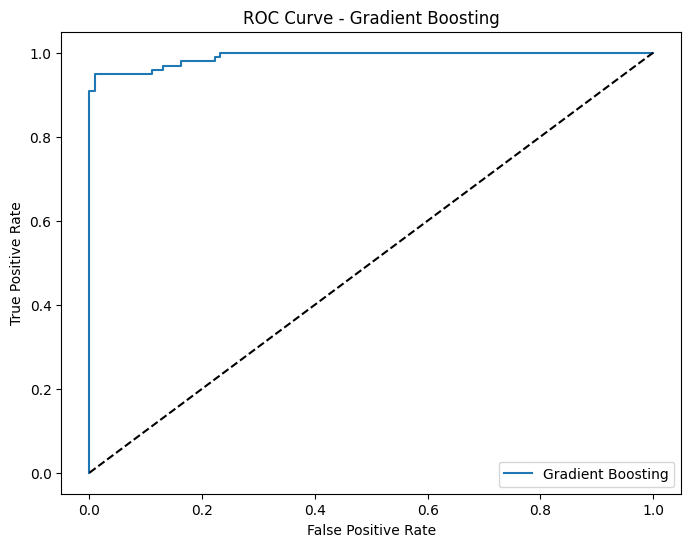

In [27]:
def evaluate_model(model, X_train, Y_train, X_test, Y_test, title):
  model.fit(X_train, Y_train)
  Y_train_pred = model.predict(X_train)
  Y_test_pred = model.predict(X_test)

  # Evaluation Metrics
  accuracy_train = accuracy_score(Y_train, Y_train_pred)
  accuracy_test = accuracy_score(Y_test, Y_test_pred)
  precision = precision_score(Y_test, Y_test_pred)
  recall = recall_score(Y_test,Y_test_pred)
  f1 = f1_score(Y_test,Y_test_pred)
  roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:,1])
  mcc = matthews_corrcoef(Y_test, Y_test_pred)
  bal_accuracy = balanced_accuracy_score(Y_test, Y_test_pred)

  # Get the correct model name
  if hasattr(model, 'estimator'):
        model_name = model.estimator.__class__.__name__
  else:
        model_name = model.__class__.__name__

  # Print metrics
  print(f"Model: {model_name}")
  print(f"Accuracy on Training Data: {accuracy_train:.4f}")
  print(f"Accuracy on Test Data: {accuracy_test:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1 Score: {f1:.4f}")
  print(f"ROC-AUC Score: {roc_auc:.4f}")
  print(f"MCC: {mcc:.4f}")
  print(f"Balanced Accuracy: {bal_accuracy:.4f}")

  # Confusion Matrix
  cm = confusion_matrix(Y_test, Y_test_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.title(title)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

# Logistic Regression
logistic_model = LogisticRegression(max_iter = 1000, random_state=42)
evaluate_model(logistic_model, X_train, Y_train, X_test, Y_test, "Confusion Matrix - Logistic Regression")

# Random Forest Classifier with RandomizedSearchCV for Hyperparameter Tuning
rf_model = RandomForestClassifier()
param_grid = {
    'n_estimators' : [100,200,500],
    'max_depth' : [10,20,None],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4]
}
rf_random_search = RandomizedSearchCV(rf_model, param_distributions = param_grid, n_iter = 10, cv=3, random_state = 42, n_jobs=-1)
evaluate_model(rf_random_search, X_train, Y_train, X_test, Y_test, "Confusion Matrix - Random Forest")

# Gradient Boosting Classifier with RandomizedSearchCV for Hyperparameter Tuning
gb_model = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators' : [100,200,500],
    'learning_rate' : [0.01,0.1,0.2],
    'max_depth' : [3,5,7],
    'subsample' : [0.7, 0.9, 1.0]
}
gb_random_search = RandomizedSearchCV(gb_model, param_distributions=param_grid_gb, n_iter=10, cv=3,random_state=42, n_jobs=-1)
evaluate_model(gb_random_search, X_train, Y_train, X_test, Y_test, "Confusion Matrix - Gradient Boosting")

# Feature Importance for Random Forest
best_rf = rf_random_search.best_estimator_
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

#Feature Importance (Gradient Boosting)
best_gb = gb_random_search.best_estimator_
importances = best_gb.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Gradient Boosting)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# ROC Curve
best_gb = gb_random_search.best_estimator_
Y_test_pred_prob = best_gb.predict_proba(X_test)[:, 1]
fpr,tpr, thresholds = roc_curve(Y_test, Y_test_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Gradient Boosting')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend()
plt.show()
